# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv('./data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [4]:
employee['Salary'].value_counts()

30    2
55    2
70    2
35    2
60    1
Name: Salary, dtype: int64

In [5]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [6]:
# Method 1 - Group by
employee.groupby('Department').describe()

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

In [7]:
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [8]:
# Method 2 - Pivot
pivot = employee.pivot_table(index='Department',aggfunc=['mean'], values='Salary')
pivot

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [9]:
employee.pivot_table(index='Department', columns =['Title'],aggfunc=['mean'],values="Salary")

mean                  
Title         VP analyst associate
Department                        
HR          70.0    32.5       NaN
IT          70.0    32.5      60.0
Sales        NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [10]:
employee.pivot_table(index='Title', columns=['Years'], aggfunc='mean')

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [11]:
pivot2 = employee.pivot_table(index=['Department','Title'], aggfunc=['mean','count'],values ='Salary')

# How can I change the name of the column? The following is not working
pivot2 = pivot2.rename(columns={('count','Salary'):('count','employees')})

pivot2

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [12]:
employee.pivot_table(index=['Department','Title'], aggfunc =['mean','median','std','min','max'],values='Salary')


mean median       std    min    max
                     Salary Salary    Salary Salary Salary
Department Title                                          
HR         VP          70.0   70.0       NaN     70     70
           analyst     32.5   32.5  3.535534     30     35
IT         VP          70.0   70.0       NaN     70     70
           analyst     32.5   32.5  3.535534     30     35
           associate   60.0   60.0       NaN     60     60
Sales      associate   55.0   55.0  0.000000     55     55

In [13]:
# QUES - I think this would be the best solution, is it posible to get something similar with a pivot table?
employee.groupby(['Department','Title'])['Salary'].describe()

count  mean       std   min    25%   50%    75%   max
Department Title                                                           
HR         VP           1.0  70.0       NaN  70.0  70.00  70.0  70.00  70.0
           analyst      2.0  32.5  3.535534  30.0  31.25  32.5  33.75  35.0
IT         VP           1.0  70.0       NaN  70.0  70.00  70.0  70.00  70.0
           analyst      2.0  32.5  3.535534  30.0  31.25  32.5  33.75  35.0
           associate    1.0  60.0       NaN  60.0  60.00  60.0  60.00  60.0
Sales      associate    2.0  55.0  0.000000  55.0  55.00  55.0  55.00  55.0

#### Based on your comments, fill the missing values with an appropriate value.

In [14]:
# I am lost


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [15]:
employee.pivot_table(index='Department',values ='Salary', aggfunc=['count','sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [16]:
employee.pivot_table(index=['Department','Title'], aggfunc ={'Years':'sum','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [17]:
employee.pivot_table(index='Department',values='Salary', aggfunc = lambda x: (sum(x)-np.max(x))/np.count_nonzero(x)-1)
# Is this correct? I have special doubts about the final -1

,Salary
Department,
HR,20.666667
IT,30.250000
Sales,26.500000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [18]:
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [19]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [20]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [21]:
fitbit[['Minutes Very Active','Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

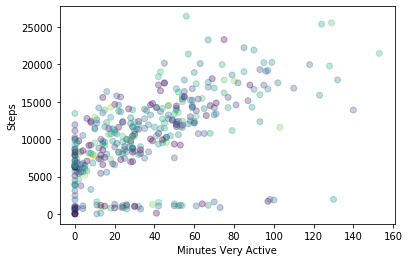

In [22]:
y = fitbit['Steps']
x = fitbit['Minutes Very Active']
color = fitbit["MinutesOfBeingAwake"]

plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

plt.scatter(x,y,c = color , alpha=0.3)
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [23]:
# Not a very strong relationship but we can still see that more minutes active usally mean more steps. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [24]:
print('Correlation',fitbit['Minutes Sedentary'].corr(fitbit['Steps']))
# Better relationship than the previous one but still week

Correlation 0.07690608062990094


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

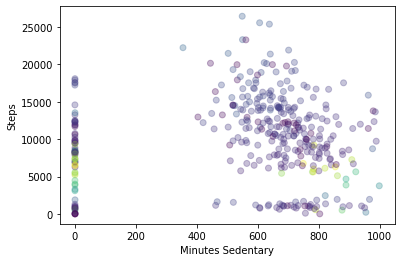

In [25]:
x = fitbit['Minutes Sedentary']
color = fitbit["Activity Calories"]

plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

plt.scatter(x,y,c = color , alpha=0.3)
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

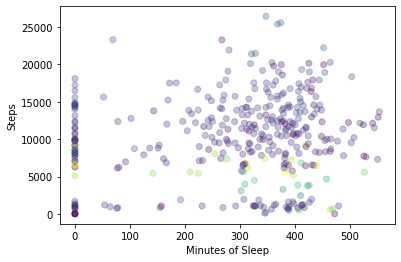

correlation: -0.005803769438041179


In [26]:
x = fitbit['MinutesOfSleep']
color = fitbit["Activity Calories"]


plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps")

plt.scatter(x,y,c = color , alpha=0.3)
plt.show()


print('correlation:',fitbit['MinutesOfSleep'].corr(fitbit['Activity Calories']))

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [27]:
# Not correlated

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [28]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column]
cor_fit = cor_fit.corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:
cor_fit.sort_values('Steps').iloc[5:6]
# Steps and minutes very active

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.0,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [30]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

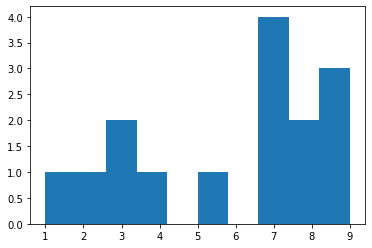

In [31]:
plt.hist(time_grades['Grade'])
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [37]:
time_grades.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [36]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [134]:
def reciprocal(x,a,b):
    return np.reciprocal(a*x) + b

def exponential(x,a,b,c,d):
    return a*np.exp(b*(x)) + c


In [135]:
y = time_grades['Study time']
x = time_grades['Grade']

popt, pcov= curve_fit(exponential, x,y)
print(popt)

# Checkout this link to see the error
# https://stackoverflow.com/questions/50371428/scipy-curve-fit-raises-optimizewarning-covariance-of-the-parameters-could-not/50372128

[2.16633436 0.21107143 0.31606464 1.        ]


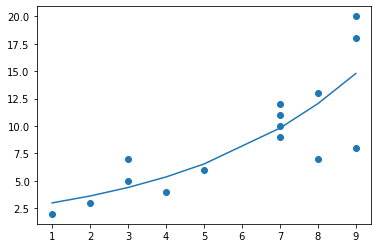

In [131]:
plt.scatter(time_grades['Grade'],time_grades['Study time'],)

plt.plot(time_grades['Grade'].sort_values(), exponential(time_grades['Grade'].sort_values(),*popt))
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [34]:
# your answer here
